In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/us_min_wage_data.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [19]:
act_min_wage = pd.DataFrame()

state = 'Alaska'
alaska_df = df[df['State'] == state]
alaska_df.set_index('Year')[['Low.2018']].rename(columns={'Low.2018': state}).head()

,Alaska
Year,
1968,15.12
1969,14.33
1970,13.54
1971,12.99
1972,12.57


In [20]:
for state, group in df.groupby('State'):
    if act_min_wage.empty:
        act_min_wage = group.set_index('Year')[['Low.2018']].rename(columns={'Low.2018': state})
    else:
        act_min_wage = act_min_wage.join(group.set_index('Year')[['Low.2018']].rename(columns={'Low.2018': state}))
        
act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [22]:
min_wage_corr = act_min_wage.replace(0, np.nan).dropna(axis=1).corr()
min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


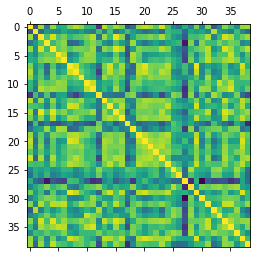

In [26]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

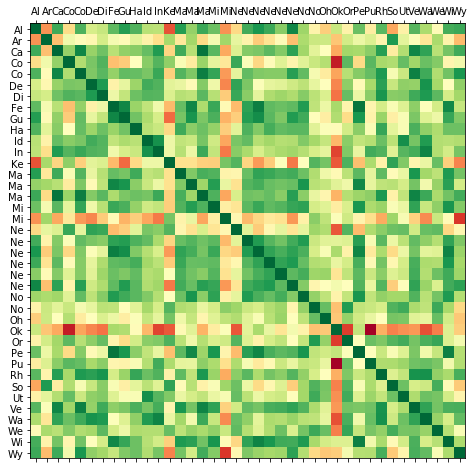

In [34]:
labels = [c[:2] for c in min_wage_corr.columns]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()

In [37]:
import pandas as pd

dfs = pd.read_html('https://www.infoplease.com/state-abbreviations-and-state-postal-codes')
for df in dfs:
    print(df.head())

  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa          NaN          AS
1                Guam         Guam          GU
2    Marshall Islands          NaN          MH
3          Micronesia          NaN          FM
4   Northern Marianas          NaN          MP


In [38]:
state_abbv = dfs[0]
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [39]:
# state_abbv.to_csv('../datasets/states_abbv.csv', index=False)

In [50]:
state_abbv = pd.read_csv('../datasets/states_abbv.csv')
state_abbv.set_index('State/District', inplace=True)
state_abbv.head()

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


In [51]:
abbv_dict = state_abbv[['Postal Code']].to_dict()
abbv_dict = abbv_dict['Postal Code']
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [53]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'Federal (FLSA)'

In [56]:
abbv_dict['Federal (FLSA)'] = 'FLSA'
abbv_dict['Guam'] = 'GU'
abbv_dict['Puerto Rico'] = 'PR'
labels = [abbv_dict[c] for c in min_wage_corr.columns]

['AK',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FLSA',
 'GU',
 'HI',
 'ID',
 'IN',
 'KY',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SD',
 'UT',
 'VT',
 'WA',
 'WV',
 'WI',
 'WY']

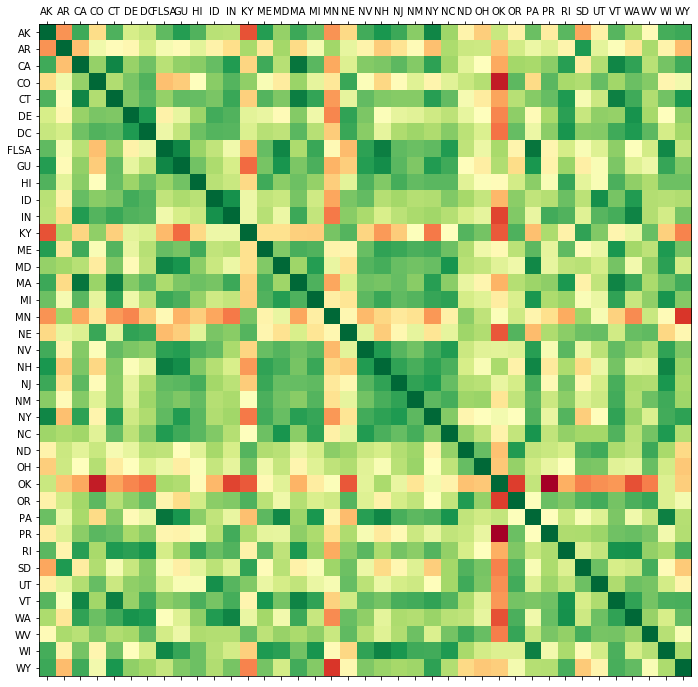

In [59]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()